## Определение наилучшей модели для оператора мобильной связи

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Необходимо построить модель с максимально большим значением accuracy. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from sklearn import *
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
try:
    df = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/users_behavior.csv")
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

df.head(10)

In [3]:
df.describe().T

In [4]:
df.info()

Набор данных не вызывает вопросов. Можно переходить к построению моделей.

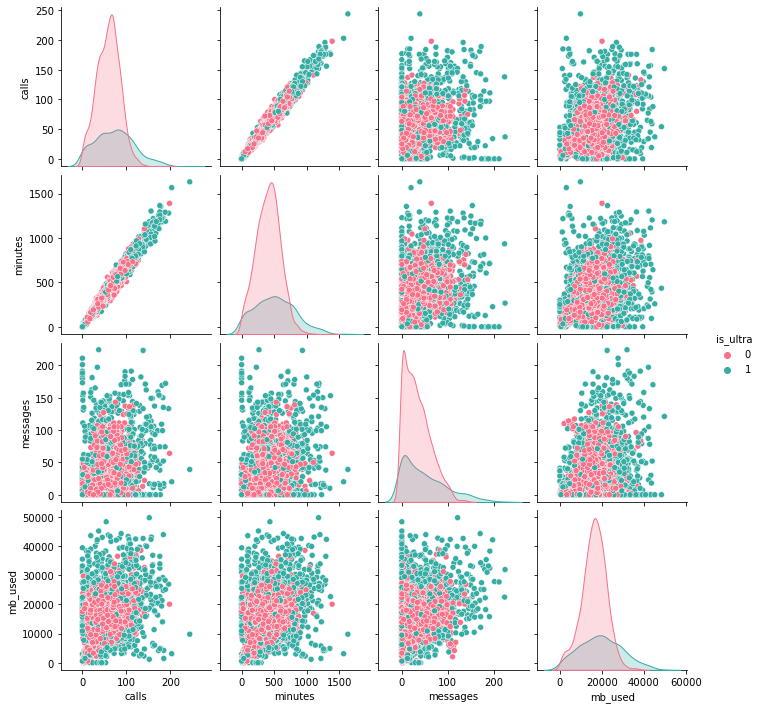

In [6]:
sns.pairplot(df, hue = 'is_ultra',palette = "husl")

## Разделение данных на выборки и построение моделей.

Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1. Сначала выделим тестовую часть.

In [6]:
3214*4/5

In [7]:
df_1 = df.loc[0:2570]
df_1.shape


In [8]:
df_test = df.loc[2571:]
df_test.shape

Теперь разделим выборку на обучающую и валидационную.

In [9]:
df_train, df_valid = train_test_split(df_1, test_size=0.25, random_state=12345)

In [10]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

In [11]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

In [12]:
best_depth = 0
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train,target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid,predictions)
    best_depth = depth
print("Accuracy наилучшей модели решающего дерева на валидационной выборке:", accuracy, "Глубина дерева:", best_depth)   

In [13]:
best_result = 0
best_depth = 0
best_est = 0
best_model = None
for est in range(10, 51, 10):
    for depth in range (1, 31):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train,target_train) 
        result = model.score(features_valid,target_valid) 
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
            
        
print("Accuracy наилучшей модели случайного леса на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)        

In [14]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)

print("Accuracy модели логистической регрессии:", model.score(features_valid, target_valid))        

По итогам обучения модели можно сказать, что алгоритм случайного леса обладает наибольшей accuracy. Затем идет решающий лес и логистическая регрессия. При этом все алгоритмы достигли требуемого уровня accuracy, равного 0.75.

In [15]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [16]:
print(features_test.shape)
print(target_test.shape)

In [17]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_train,target_train)
predictions = model.predict(features_test)
accuracy = accuracy_score(target_test,predictions)
   
print("Accuracy модели решающего дерева на тестовой выборке:", accuracy, "Глубина дерева:", best_depth) 

In [18]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=30) 
model.fit(features_train,target_train)
result = model.score(features_test,target_test) 
        
print("Accuracy модели случайного леса на тестовой выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)        

In [19]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
print("Accuracy модели логистической регрессии:", model.score(features_test,target_test))  

## Проверка модели на вменяемость

Дополнительно проверим модели с самыми высокими показателями accuracy на вменяемость. Рассчитаем матрицу ошибок и f1-меру:

In [20]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=30) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(confusion_matrix(target_valid,predicted_valid))
print(f1_score(target_valid,predicted_valid))

In [21]:
model = DecisionTreeClassifier(random_state=12345, max_depth=10)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(confusion_matrix(target_valid,predicted_valid))
print(f1_score(target_valid,predicted_valid))

## Общий вывод


Тестирование подтвердило выводы, полученные по итогам обучения модели. При заданных гиперпараметрах случайный лес обладает самым высоким показателем accuracy (0.80), затем идет решающее дерево (0.79). Accuracy логистической регрессии не достигает требуемого уровня. При этом, алгоритм случайного леса также обладает более высокой f1-мерой по сравнению с решающим деревом. 